In [1]:
#  1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 2. Load the Cleaned Dataset
df = pd.read_csv("global_student_migration_New_cleaned.csv")
df.head()

,student_id,origin_country,destination_country,destination_city,university_name,course_name,field_of_study,year_of_enrollment,scholarship_received,enrollment_reason,graduation_year,placement_status,placement_country,placement_company,starting_salary_usd,gpa_or_score,visa_status,post_graduation_visa,language_proficiency_test,test_score
0,S00001,Finland,Russia,Moscow,Lomonosov Moscow State University,Computer Science,Engineering,2021,No,Higher Ranking,2024,Placed,Russia,Microsoft,36416,3.92,Tier 4,Work Permit,TOEFL,7.8
1,S00002,United Kingdom,Germany,Aachen,RWTH Aachen,Civil Engineering,Law,2023,Yes,Job Opportunities,2024,Placed,Germany,Google,32956,2.60,Study Permit,OPT,PTE,7.9
2,S00003,Ireland,Canada,Vancouver,University of British Columbia,Law,Arts,2019,No,Scholarship,2020,Not Placed,Unknown,NaN,0,2.72,F1,Blue Card,NaN,0.0
3,S00004,United Arab Emirates,United Kingdom,Birmingham,University of Birmingham,Data Science,Social Sciences,2021,Yes,Quality of Life,2023,Placed,UK,Apple,50892,3.71,Schengen Student Visa,PSW,NaN,0.0
4,S00005,South Africa,Germany,Stuttgart,University of Stuttgart,Business Administration,Law,2020,Yes,Political Stability,2021,Placed,Germany,IBM,54790,2.96,Schengen Student Visa,OPT,PTE,8.2


In [10]:
# 2. Data Preparation 

import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Load the data
df = pd.read_csv("global_student_migration_New_cleaned.csv")

# Convert placement_status to binary
df['placement_success'] = df['placement_status'].apply(lambda x: 1 if x == 'Placed' else 0)

# Convert scholarship to binary
df['scholarship_received'] = df['scholarship_received'].map({'Yes': 1, 'No': 0})

# Encode categorical variables
le = LabelEncoder()
categorical_cols = ['origin_country', 'field_of_study', 'visa_status', 'language_proficiency_test']

for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# Feature Selection
features = ['origin_country', 'field_of_study', 'gpa_or_score', 'test_score',
            'scholarship_received', 'visa_status']
X = df[features]
y = df['placement_success']

# Standardize numerical features
scaler = StandardScaler()
X.loc[:,['gpa_or_score', 'test_score']] = scaler.fit_transform(X[['gpa_or_score', 'test_score']])

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((4000, 6), (1000, 6))

In [4]:
# Check column types to spot object (non-numeric) columns
print(X.dtypes)

origin_country            int64
field_of_study            int64
gpa_or_score            float64
test_score              float64
scholarship_received      int64
visa_status               int64
dtype: object


In [12]:
# Drop non-predictive or high-cardinality columns
df = df.drop(columns=[
    'student_id',
    'destination_city',
    'university_name',
    'placement_company'
])

# Drop target or rows with missing values in the target
df.dropna(subset=['placement_status'], inplace=True)

# Fill missing numerical values
df['gpa_or_score'] = df['gpa_or_score'].fillna(df['gpa_or_score'].median())
df['test_score'] = df['test_score'].fillna(0)

# Encode categorical columns
categorical_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# Define features and target
X = df.drop(columns=['placement_status', 'placement_country'], errors='ignore')
y = df['placement_status']

# Normalize numeric columns
scaler = StandardScaler()
X[['gpa_or_score', 'test_score']] = scaler.fit_transform(X[['gpa_or_score', 'test_score']])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [7]:
#Check column types to spot object (non-numeric) columns
print(y.dtypes)

int64


In [9]:
# Save the cleaned dataset to a new CSV file
df.to_csv("cleaned_student_placement_data.csv", index=False)

# Display the first 10 rows to review
df.head(10)

,origin_country,destination_country,course_name,field_of_study,year_of_enrollment,scholarship_received,enrollment_reason,graduation_year,placement_status,placement_country,starting_salary_usd,gpa_or_score,visa_status,post_graduation_visa,language_proficiency_test,test_score,placement_success
0,1,5,4,3,2021,0,0,2024,1,5,36416,3.92,5,4,3,7.8,1
1,8,2,3,4,2023,1,1,2024,1,2,32956,2.60,4,1,2,7.9,1
2,4,0,10,0,2019,0,4,2020,0,10,0,2.72,0,0,4,0.0,0
3,7,8,5,7,2021,1,3,2023,1,8,50892,3.71,2,2,4,0.0,1
4,6,2,2,4,2020,1,2,2021,1,2,54790,2.96,2,1,2,8.2,1
5,7,6,11,3,2022,1,1,2023,0,10,0,2.69,1,0,3,7.4,0
6,7,8,0,4,2019,1,3,2021,0,10,0,2.99,4,0,0,5.6,0
7,7,8,9,4,2023,0,1,2024,1,8,98247,3.53,3,4,1,5.4,1
8,3,5,7,1,2021,1,0,2024,1,5,118106,3.20,3,4,4,0.0,1
9,2,3,5,1,2023,0,3,2025,1,3,78324,2.65,1,3,4,0.0,1


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report,
    mean_squared_error, mean_absolute_error
)


# 📌 Fit the Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_resampled, y_train_resampled)

# 🔍 Predictions
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:, 1]

# Classification metrics
print("✔️ Accuracy: ", round(accuracy_score(y_test, y_pred), 4))
print("✔️ Precision:", round(precision_score(y_test, y_pred), 4))
print("✔️ Recall:   ", round(recall_score(y_test, y_pred), 4))
print("✔️ F1 Score: ", round(f1_score(y_test, y_pred), 4))
print("\n🧾 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Regression-style metrics (on labels)
print("\n📉 MSE (Labels):", round(mean_squared_error(y_test, y_pred), 4))
print("📉 MAE (Labels):", round(mean_absolute_error(y_test, y_pred), 4))

# Optional: Probabilistic predictions (for ROC later)
print("\n📊 MSE (Probabilities):", round(mean_squared_error(y_test, y_proba), 4))
print("📊 MAE (Probabilities):", round(mean_absolute_error(y_test, y_proba), 4))

✔️ Accuracy:  1.0
✔️ Precision: 1.0
✔️ Recall:    1.0
✔️ F1 Score:  1.0

🧾 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       475
           1       1.00      1.00      1.00       525

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000


🧮 Confusion Matrix:
 [[475   0]
 [  0 525]]

📉 MSE (Labels): 0.0
📉 MAE (Labels): 0.0

📊 MSE (Probabilities): 0.0
📊 MAE (Probabilities): 0.0


In [21]:
# 3. Logistic Regression Model

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

Logistic Regression Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       475
           1       1.00      1.00      1.00       525

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

Confusion Matrix:
[[475   0]
 [  0 525]]


In [20]:
#  4. Random Forest Model

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       475
           1       1.00      1.00      1.00       525

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

Confusion Matrix:
[[475   0]
 [  0 525]]


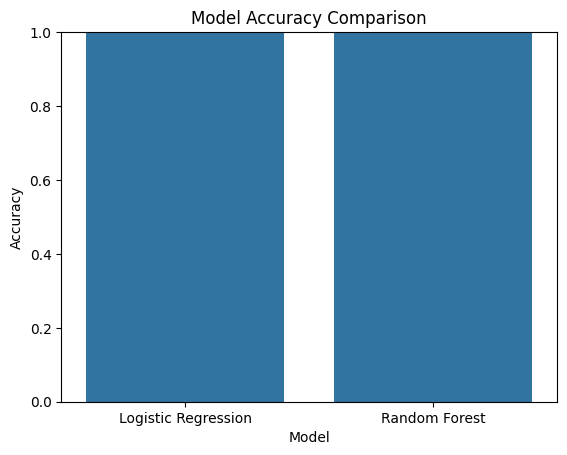

In [12]:
from sklearn.metrics import accuracy_score

acc_lr = accuracy_score(y_test, y_pred_lr)
acc_rf = accuracy_score(y_test, y_pred_rf)

models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [acc_lr, acc_rf]
})

sns.barplot(x='Model', y='Accuracy', data=models)
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.show()

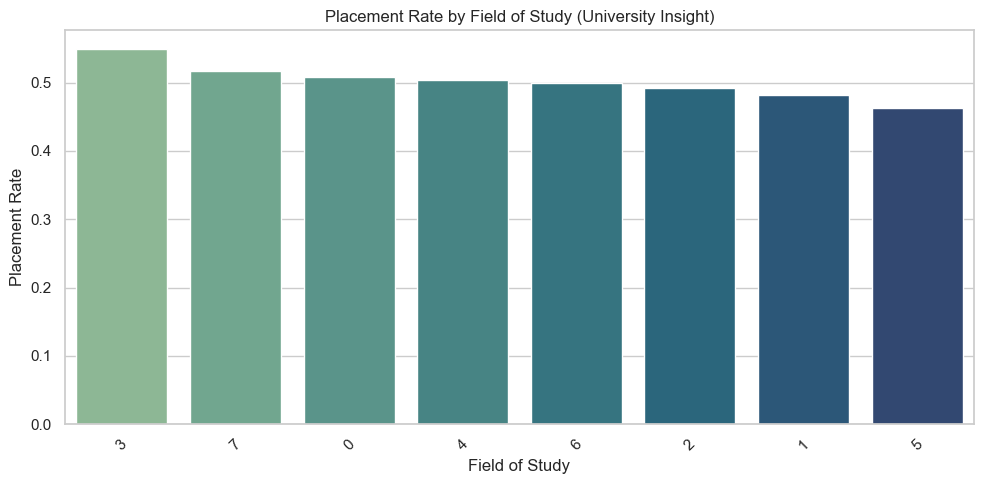

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your cleaned dataset
df = pd.read_csv("cleaned_student_placement_data.csv")

# Insight 1: Universities - Which Fields of Study Have the Highest Placement Rates?
plt.figure(figsize=(10, 5))
field_placement = df.groupby('field_of_study')['placement_status'].mean().sort_values(ascending=False)
sns.barplot(
    x=field_placement.index.astype(str),
    y=field_placement.values,
    hue=field_placement.index.astype(str),  # Add hue to fix FutureWarning
    palette="crest",
    legend=False
)
plt.title("Placement Rate by Field of Study (University Insight)")  # Remove emoji if needed
plt.xlabel("Field of Study")
plt.ylabel("Placement Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

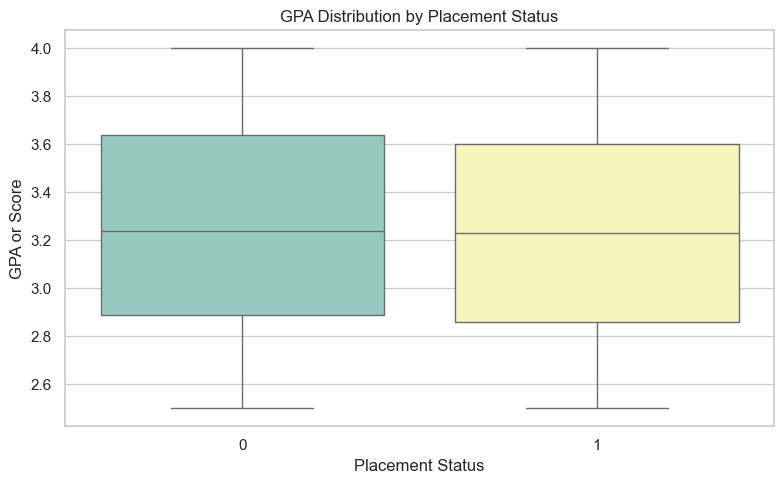

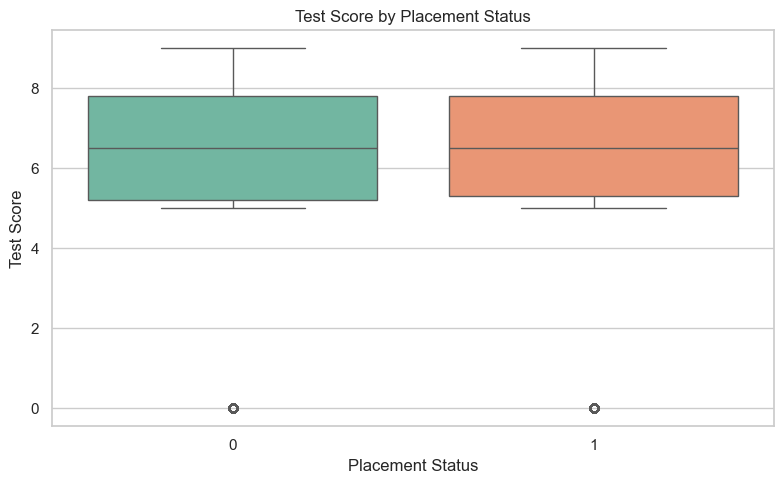

In [39]:
# Insight 2: Recruiters - GPA and Test Scores vs Placement

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='placement_status', y='gpa_or_score', palette='Set3', hue='placement_status', legend=False)
plt.title("GPA Distribution by Placement Status") 
plt.xlabel("Placement Status")
plt.ylabel("GPA or Score")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='placement_status', y='test_score', hue='placement_status', palette='Set2', legend=False)
plt.title("Test Score by Placement Status")  # 
plt.xlabel("Placement Status")
plt.ylabel("Test Score")
plt.tight_layout()
plt.show()

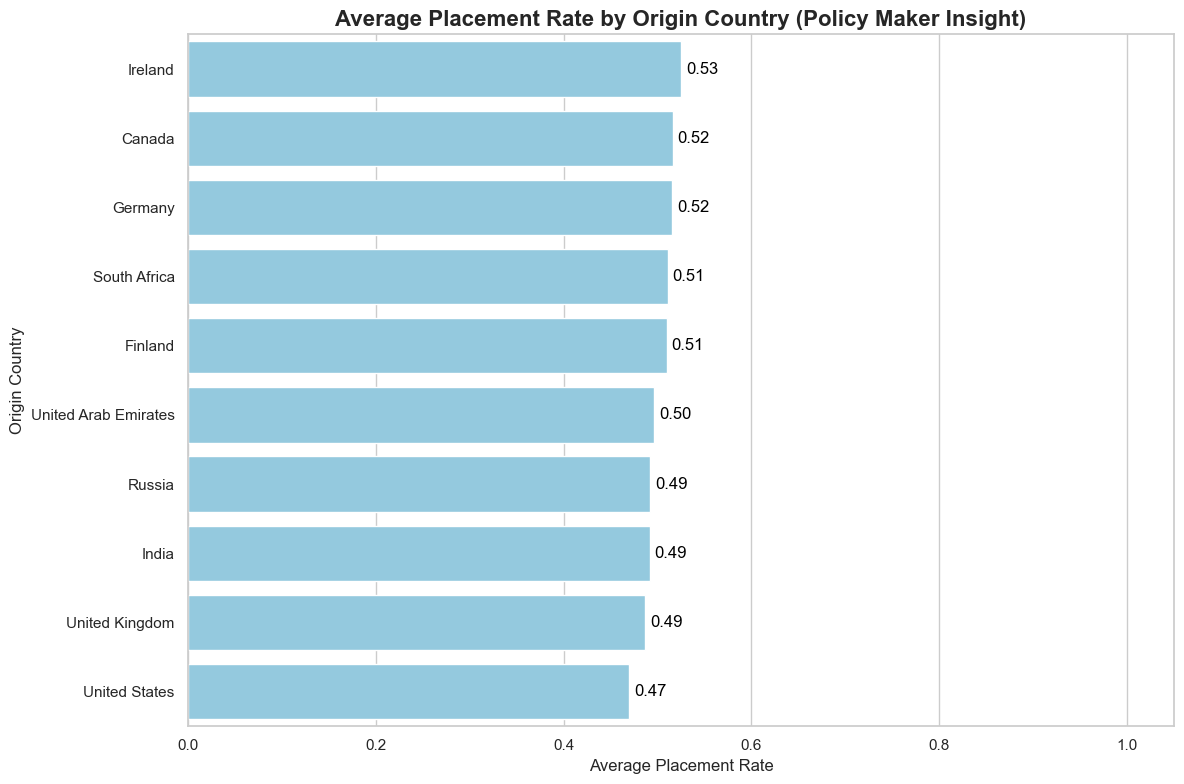

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
# Insight 3: Policy Makers - Placement Rate by Origin Country
# Load  dataset
df = pd.read_csv("global_student_migration_New_cleaned.csv")
#  Convert placement_status to numeric
df['placement_status_numeric'] = df['placement_status'].map({'Placed': 1, 'Not Placed': 0})

# Now compute the average placement rate
country_placement = df.groupby('origin_country')['placement_status_numeric'].mean().sort_values(ascending=False)

#  Plot
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

barplot = sns.barplot(
    x=country_placement.values,
    y=country_placement.index.astype(str),
    color="skyblue"
)

# Annotate bars
for i, v in enumerate(country_placement.values):
    barplot.text(v + 0.005, i, f"{v:.2f}", color='black', va="center")

plt.title("Average Placement Rate by Origin Country (Policy Maker Insight)", fontsize=16, fontweight='bold')
plt.xlabel("Average Placement Rate", fontsize=12)
plt.ylabel("Origin Country", fontsize=12)
plt.xlim(0, 1.05)
plt.tight_layout()
plt.show()


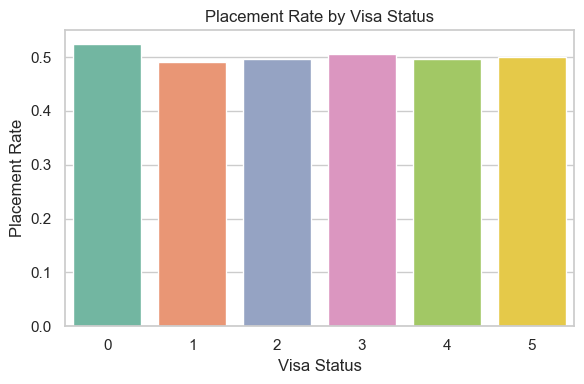

In [38]:
#Insight 4: Visa Status Impact
# Load your cleaned dataset
df = pd.read_csv("cleaned_student_placement_data.csv")
plt.figure(figsize=(6, 4))
visa_placement = df.groupby('visa_status')['placement_status'].mean()
sns.barplot(x=visa_placement.index.astype(str), y=visa_placement.values, hue=visa_placement.index.astype(str), palette='Set2', legend=False)
plt.title("Placement Rate by Visa Status")
plt.xlabel("Visa Status")
plt.ylabel("Placement Rate")
plt.tight_layout()
plt.show()

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pickle

# Load dataset
df = pd.read_csv("global_student_migration_New_cleaned.csv")

# Features and target
features = ['gpa_or_score', 'language_proficiency_test', 'test_score']
target = 'placement_status'

X = df[features]
y = df[target]

# Preprocessing for categorical column
categorical_features = ['language_proficiency_test']
numeric_features = ['gpa_or_score', 'test_score']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'  # keep numeric columns as-is
)

# Create pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model_pipeline.fit(X_train, y_train)

# Save the pipeline
with open("model.pkl", "wb") as f:
    pickle.dump(model_pipeline, f)
